<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/PerturbationHES003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

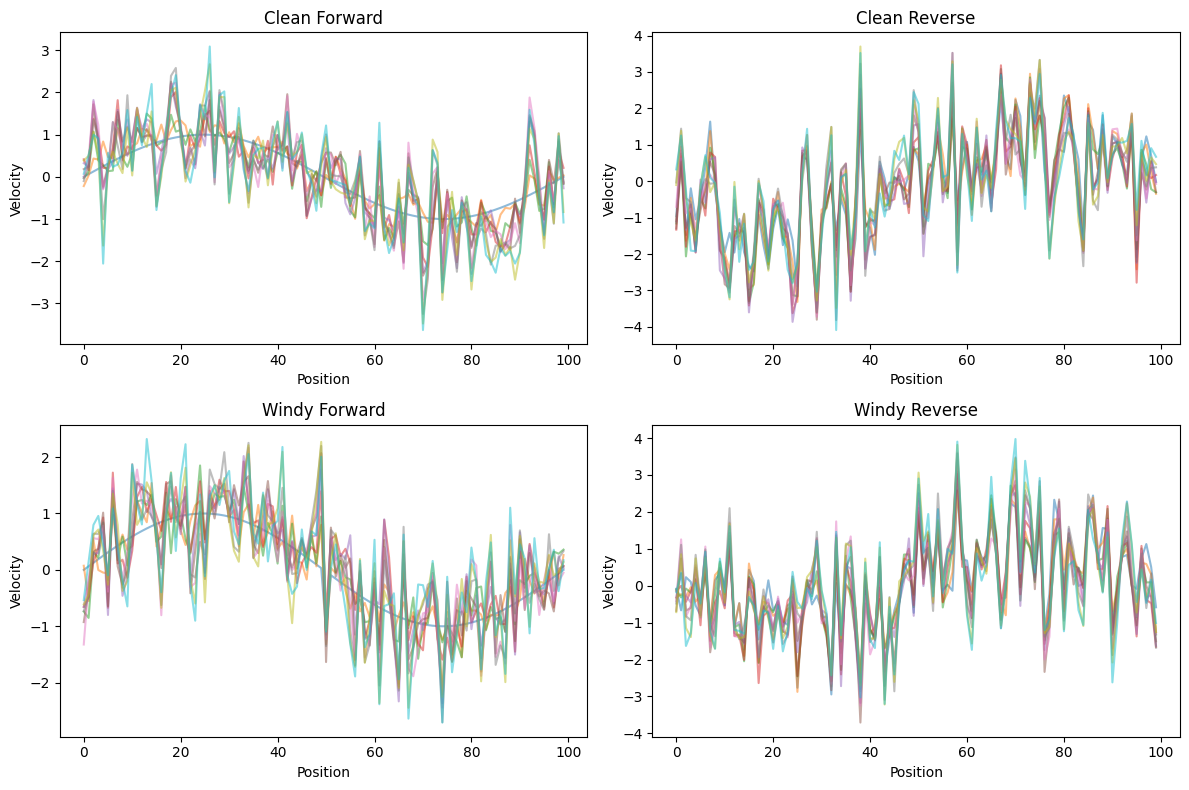

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100
T = 100
x = np.linspace(0, 1, N)
v0 = np.sin(2 * np.pi * x)

# Perturbation
def add_wind(v, strength=1.0, location=N//2):
    v_perturbed = v.copy()
    v_perturbed[location] += strength * np.random.randn()
    return v_perturbed

# Evolution
def evolve(v_init, steps, noise_level=0.1):
    traj = [v_init.copy()]
    v = v_init.copy()
    for _ in range(steps):
        v += np.random.randn(N) * noise_level
        traj.append(v.copy())
    return np.array(traj)

# Runs
traj_clean_fwd = evolve(v0, T)
traj_clean_rev = evolve(traj_clean_fwd[-1][::-1], T)

v_wind = add_wind(v0)
traj_wind_fwd = evolve(v_wind, T)
traj_wind_rev = evolve(traj_wind_fwd[-1][::-1], T)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def plot_traj(ax, traj, title):
    for i in range(0, T, 10):
        ax.plot(traj[i], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel("Position")
    ax.set_ylabel("Velocity")

plot_traj(axs[0, 0], traj_clean_fwd, "Clean Forward")
plot_traj(axs[0, 1], traj_clean_rev, "Clean Reverse")
plot_traj(axs[1, 0], traj_wind_fwd, "Windy Forward")
plot_traj(axs[1, 1], traj_wind_rev, "Windy Reverse")

plt.tight_layout()
plt.show()
